In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/association rule/book.csv")
df


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
# Convert binary values to boolean for better representation
df_boolean = df.astype(bool)
df_boolean

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,True,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,True,False,True,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,True,False,False,True,True,True,False,True,True
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,True,False,False,False,False,False,False,False,False


In [6]:
# Vary support and confidence values
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]

In [7]:

for support in support_values:
    for confidence in confidence_values:
        frequent_itemsets = apriori(df_boolean, min_support=support, use_colnames=True)
        
        if frequent_itemsets.empty:
            print(f"\nSupport: {support}, Confidence: {confidence}")
            print("No frequent itemsets found.")
        else:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
            
            print(f"\nSupport: {support}, Confidence: {confidence}")
            print(f"Number of Rules: {len(rules)}")
            print(rules)


Support: 0.1, Confidence: 0.5
Number of Rules: 49
             antecedents          consequents  antecedent support  \
0             (YouthBks)           (ChildBks)              0.2475   
1              (CookBks)           (ChildBks)              0.4310   
2             (ChildBks)            (CookBks)              0.4230   
3             (DoItYBks)           (ChildBks)              0.2820   
4               (RefBks)           (ChildBks)              0.2145   
5               (ArtBks)           (ChildBks)              0.2410   
6              (GeogBks)           (ChildBks)              0.2760   
7             (YouthBks)            (CookBks)              0.2475   
8             (DoItYBks)            (CookBks)              0.2820   
9               (RefBks)            (CookBks)              0.2145   
10              (ArtBks)            (CookBks)              0.2410   
11             (GeogBks)            (CookBks)              0.2760   
12            (ItalCook)            (CookBks)       

In [8]:
# Example with min_length parameter set to 2
min_length_values = [2, 3, 4]


In [9]:

for min_length in min_length_values:
    frequent_itemsets = apriori(df_boolean, min_support=0.2, use_colnames=True, max_len=min_length)
    
    if frequent_itemsets.empty:
        print(f"\nMin Length: {min_length}")
        print("No frequent itemsets found.")
    else:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        
        print(f"\nMin Length: {min_length}")
        print(f"Number of Rules: {len(rules)}")
        print(rules)



Min Length: 2
Number of Rules: 2
  antecedents consequents  antecedent support  consequent support  support  \
0   (CookBks)  (ChildBks)               0.431               0.423    0.256   
1  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.593968  1.404179  0.073687    1.421069       0.505870  
1    0.605201  1.404179  0.073687    1.441240       0.498856  

Min Length: 3
Number of Rules: 2
  antecedents consequents  antecedent support  consequent support  support  \
0   (CookBks)  (ChildBks)               0.431               0.423    0.256   
1  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.593968  1.404179  0.073687    1.421069       0.505870  
1    0.605201  1.404179  0.073687    1.441240       0.498856  

Min Length: 4
Number of Rules: 2
  antecedents consequents  antecedent support  con

In [10]:
# Visualization example using scatter plot

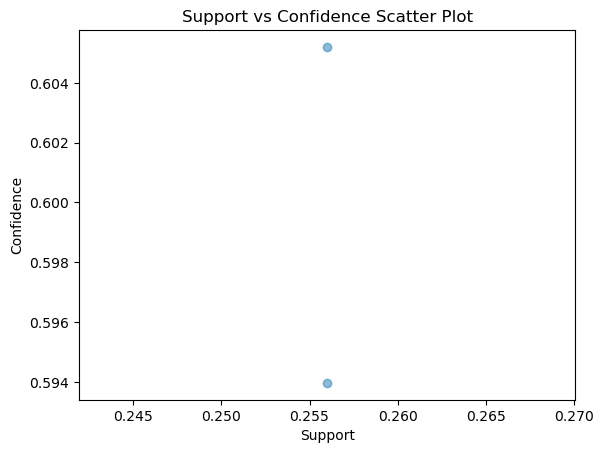

In [11]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence Scatter Plot')
plt.show()

In [12]:

# Histogram of Rule Distribution based on Support

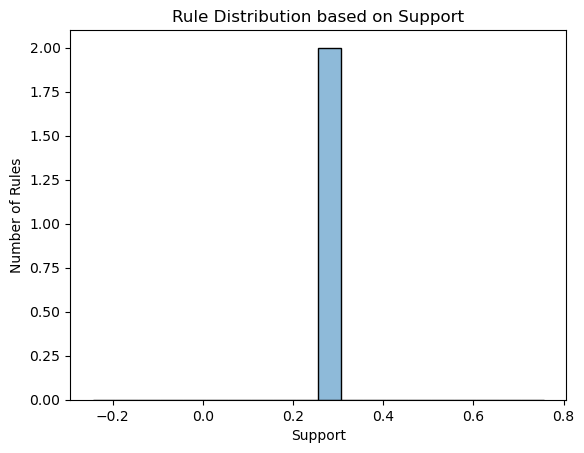

In [13]:
import seaborn as sns
sns.histplot(rules['support'], bins=20, kde=True)
plt.xlabel('Support')
plt.ylabel('Number of Rules')
plt.title('Rule Distribution based on Support')
plt.show()
